In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier


In [12]:
wine_ds = pd.read_csv(r"D:\Python\ML projects\6. Wine Quality\winequality-red.csv")

In [13]:
print(wine_ds.shape)
wine_ds.head()

(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
wine_ds.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
wine_ds.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


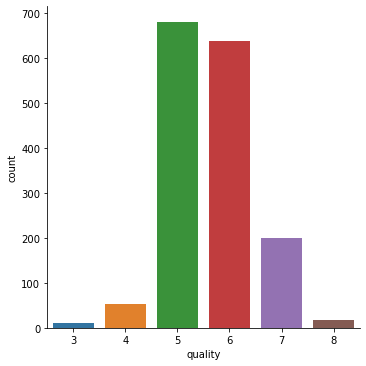

In [14]:
# number of entries for each quantity

sns.catplot(x='quality',data=wine_ds,kind = 'count')

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

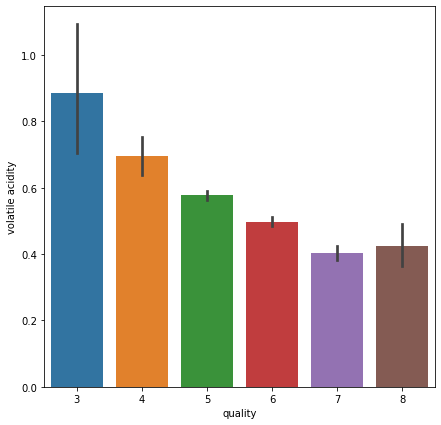

In [37]:
# to check correlation of each column with quality
# Volatile acidity vs Qualtiy

plot = plt.figure(figsize=(7,7))
sns.barplot(x='quality',y='volatile acidity',data=wine_ds)

# higher the volatile acidity, lower the quality 

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

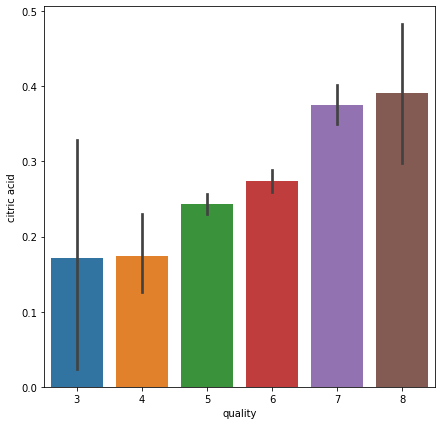

In [20]:
# citric acid vs quality

plot = plt.figure(figsize=(7,7))
sns.barplot(x='quality',y='citric acid',data=wine_ds)

# HIGHER CITRIC ACID, HIGHER QUALITY

In [21]:
correlation = wine_ds.corr()

<AxesSubplot:>

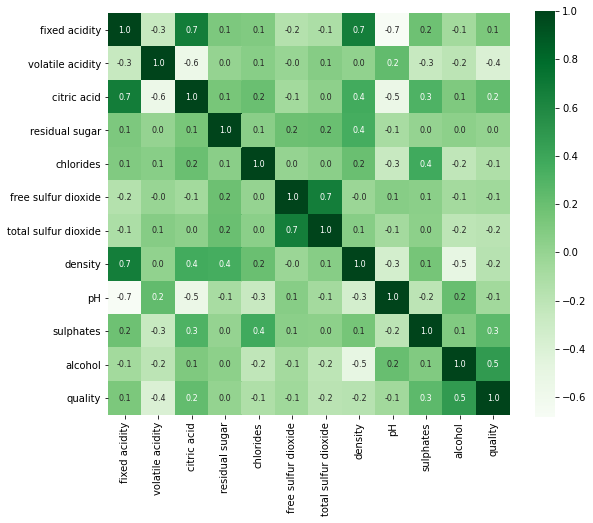

In [46]:
# finding correlation by constructing heatmap

plt.figure(figsize=(9,9))
sns.heatmap(correlation, cbar=True, cbar_kws={'shrink':.83}, square=True, fmt='.1f',
            annot=True, annot_kws={'size':8}, cmap='Greens' )

In [47]:
# seperation

x= wine_ds.drop('quality', axis=1)



In [50]:
# before storing quality in 'y', binarize the data as good or bad (1 or 0)
y= wine_ds['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)
print(y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


In [53]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=1)

In [52]:
model = RandomForestClassifier()

In [54]:
model.fit(x_train,y_train)

RandomForestClassifier()

In [56]:
predict_train = model.predict(x_train)
acc_train = accuracy_score(predict_train,y_train)
print(acc_train)

1.0


In [57]:
predict_test = model.predict(x_test)
acc_test = accuracy_score(predict_test,y_test)
print(acc_test)

0.91875


In [65]:
input_d = (7.5,0.52,0.16,1.9,0.085,12.0,35.0,0.9968,3.38,0.62,9.5)
input_d = np.asarray(input_d)
input_d = input_d.reshape(1,-1)
predict = model.predict(input_d)

if predict[0] == 1:
    print(predict,'\nGood stuff')
else:
    print(predict,'\nNot TODAAY')


[1] 
Good stuff
